In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)

In [2]:
# Importing the dataset
dataset = pd.read_csv('Customer-Churn-Data.csv',index_col='customerID')

In [3]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

No Nans found! Great

In [7]:
dataset.drop_duplicates(inplace=True)

In [8]:
dataset.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# using only Spending_Score and income variable for easy visualisation
X = dataset[['SeniorCitizen','tenure', 'MonthlyCharges']].values

In [10]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
sil_score = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    label = kmeans.predict(X)
    sil_score.append(silhouette_score(X, label))
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

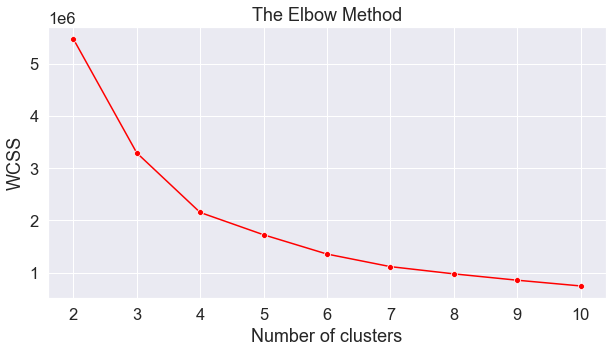

In [11]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


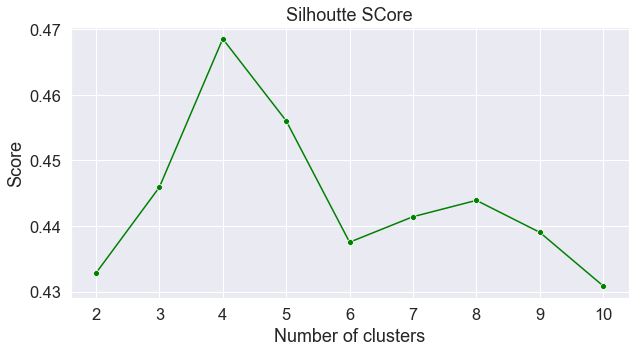

In [12]:
plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), sil_score,marker='o',color='green')
plt.title('Silhoutte SCore')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()


# Menentukan total k

In [13]:

kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 69)
y_kmeans = kmeans.fit_predict(X)

<a id="7"></a>
## 7. Visualisation

In [14]:
dataset['group'] = y_kmeans

# cluster 1

In [15]:
cluster1 = dataset[dataset.group==0]
cluster1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,group
customerID,,,,,,,,,,,,,,,,,,,,,
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0
9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,0
1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No,0
7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,0
5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No,0
8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,No,...,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No,0
7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,Yes,...,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No,0


# cluster 2

In [16]:
cluster2 = dataset[dataset.group==2]
cluster2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,group
customerID,,,,,,,,,,,,,,,,,,,,,
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No,2
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,2
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,2
9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,2
6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No,2
9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No,2
0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,2


# cluster 3


In [17]:
cluster3 = dataset[dataset.group==2]
cluster3

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,group
customerID,,,,,,,,,,,,,,,,,,,,,
8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No,2
0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,2
3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No,2
9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,...,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No,2
6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7398-LXGYX,Male,0,Yes,No,44,Yes,Yes,Fiber optic,Yes,No,...,No,No,No,Month-to-month,Yes,Credit card (automatic),84.80,3626.35,No,2
9281-CEDRU,Female,0,Yes,No,68,Yes,No,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Bank transfer (automatic),64.10,4326.25,No,2
0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes,2


# cluster 4

In [18]:
cluster4 = dataset[dataset.group==3]
cluster4

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,3
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,3
6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No,3
9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No,3
7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.8,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No,3
8775-CEBBJ,Female,0,No,No,9,Yes,No,DSL,No,No,...,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes,3
2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,3


In [19]:
print(X[y_kmeans == 0,0][1])
print(X[y_kmeans == 0,1][1])
print(X[y_kmeans == 0,2][1])

0.0
8.0
99.65


In [20]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

C:\Users\hiras\AppData\Local\Temp/ipykernel_10944/2538111699.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


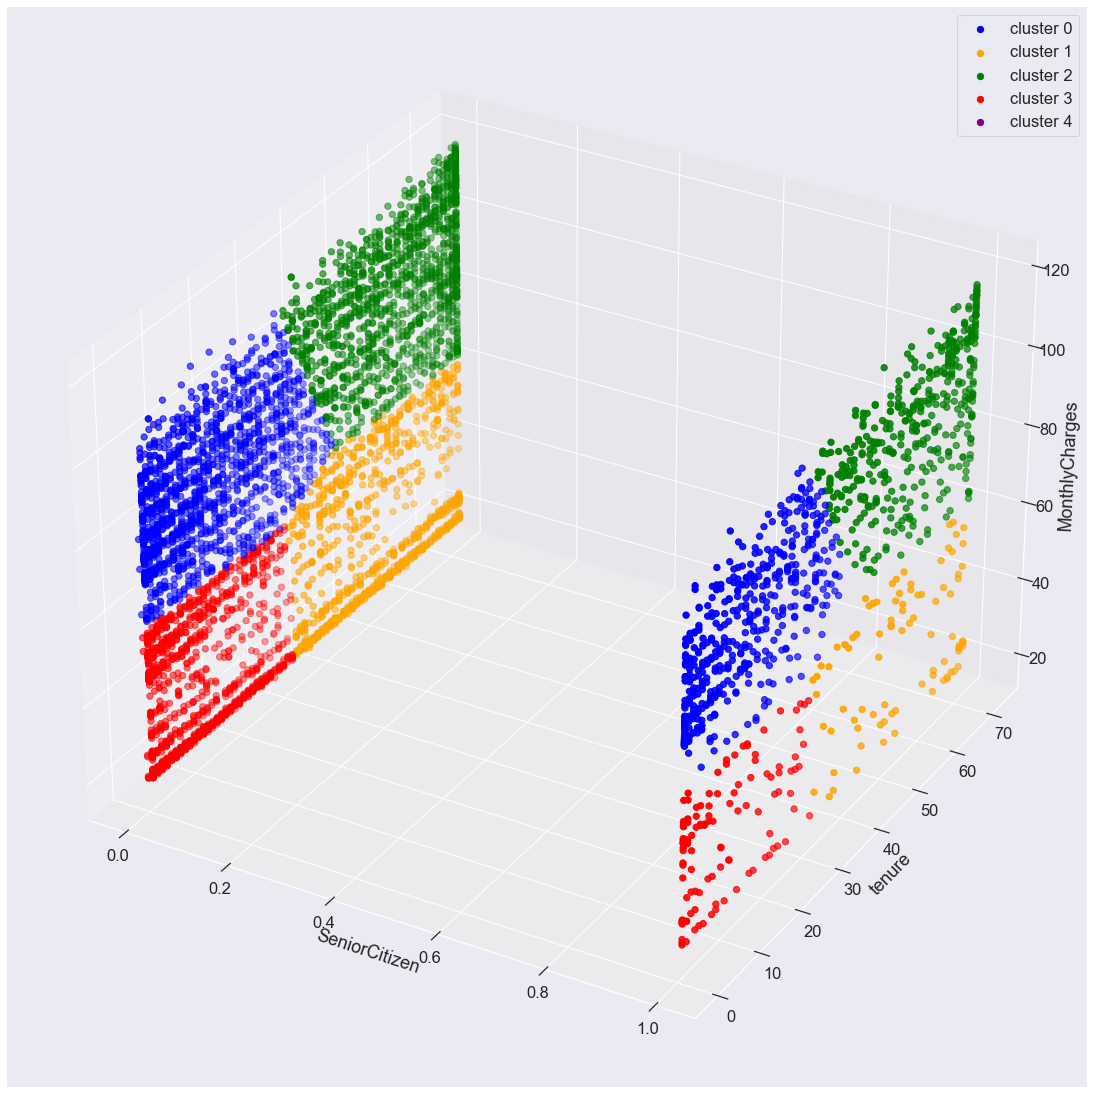

In [21]:
fig = plt.figure(figsize = (15,15))
ax = Axes3D(fig)
ax.scatter(X[y_kmeans == 0,0],X[y_kmeans == 0,1],X[y_kmeans == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(X[y_kmeans == 1,0],X[y_kmeans == 1,1],X[y_kmeans == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(X[y_kmeans == 2,0],X[y_kmeans == 2,1],X[y_kmeans == 2,2], s = 40 , color = 'green', label = "cluster 2")
ax.scatter(X[y_kmeans == 3,0],X[y_kmeans == 3,1],X[y_kmeans == 3,2], s = 40 , color = 'red', label = "cluster 3")
ax.scatter(X[y_kmeans == 4,0],X[y_kmeans == 4,1],X[y_kmeans == 4,2], s = 40 , color = 'purple', label = "cluster 4")
ax.set_xlabel('SeniorCitizen')
ax.set_ylabel('tenure')
ax.set_zlabel('MonthlyCharges')
ax.legend()
plt.show()

# Rata Rata dari Bagian senior citizen dengan rata rata tenure pada masing2 cluster

In [22]:
cluster1.groupby('SeniorCitizen')['tenure'].mean().reset_index()


,SeniorCitizen,tenure
0,0,14.832342
1,1,14.824351


In [23]:
cluster2.groupby('SeniorCitizen')['tenure'].mean().reset_index()


,SeniorCitizen,tenure
0,0,59.033333
1,1,57.143192


In [24]:
cluster3.groupby('SeniorCitizen')['tenure'].mean().reset_index()


,SeniorCitizen,tenure
0,0,59.033333
1,1,57.143192


In [25]:
cluster4.groupby('SeniorCitizen')['tenure'].mean().reset_index()


,SeniorCitizen,tenure
0,0,10.720249
1,1,10.209677
